# Lab 2 Analysis for 40 rpm
Undamped natural frequency $\omega_d$ of 1.6801 Hz and damping ratio $\zeta$ of 0.0083. Then I find 3 phases in phase frequency figure at 3 peaks frequency corresponding to amplitude frequency figure
<p align="center">
<img src="/Users/yunzhuorui/2025_winter/Vibration/Lab2_Group_B/3peaks_phase.png" alt="No additional mass" width="50%"/>
</p>
3 points are (0.661851, 0.536254), (1.3237, -4.34113), (1.98555, -176.112)
amplitude frequency figure:
<p align="center">
<img src="/Users/yunzhuorui/2025_winter/Vibration/Lab2_Group_B/40rpm/amplitude.png" alt="No additional mass" width="50%"/>
</p>

For base excitation, the frequency response function (FRF) is :
$$
\begin{aligned}
\frac{X}{X_b} = \frac{i2\zeta \omega_n \omega + \omega_n^2}{\omega_n^2- \omega^2 + i2\zeta \omega_n \omega} = \frac{1+i2\zeta \omega/ \omega_n}{1-(\omega/\omega_n)^2+i2\zeta \omega/\omega_n}
\end{aligned}
$$
phase angle of the frequency response is :
$$
\begin{aligned}
\phi(\omega) = tan^{-1}[\frac{-Im \,G(i\omega)}{Re \,G(i\omega)}] = tan^{-1}\frac{2\zeta \omega/\omega_n}{1-(\omega/\omega_n)^2}
\end{aligned}
$$

In [56]:
import numpy
from numpy import sqrt, zeros, abs, arctan2, rad2deg, linspace
# set parameter
f_d = 1.6801
zeta = 0.0083
f_n = f_d / sqrt(1-zeta**2)
# r = w/w_n = f/f_n
f_i = {0: 0.661851, 
       1: 1.3237, 
       2: 1.98555}

r = [f_i[i] / f_n for i in range(3)]
H_f = [(1 + 1j*2*zeta*ri) / (1 - ri**2 + 1j*2*zeta*ri) for ri in r]
H_mag = abs(H_f)       
phi = [(arctan2(2*zeta*ri, (1-ri**2))) for ri in r ]
r_pts = r
display(H_mag)
display(rad2deg(phi))
# experimenral transibility
T1 = 0.0176479/0.0146095
T2 = 0.019381/0.0061057
T3 = 0.0149489/0.00795668
T_exp = [T1, T2, T3]

array([1.1836662 , 2.63506741, 2.51905309])

array([  0.44347093,   1.97474388, 177.16800764])

Text(0.5, 1.0, 'phase angle for frequency response')

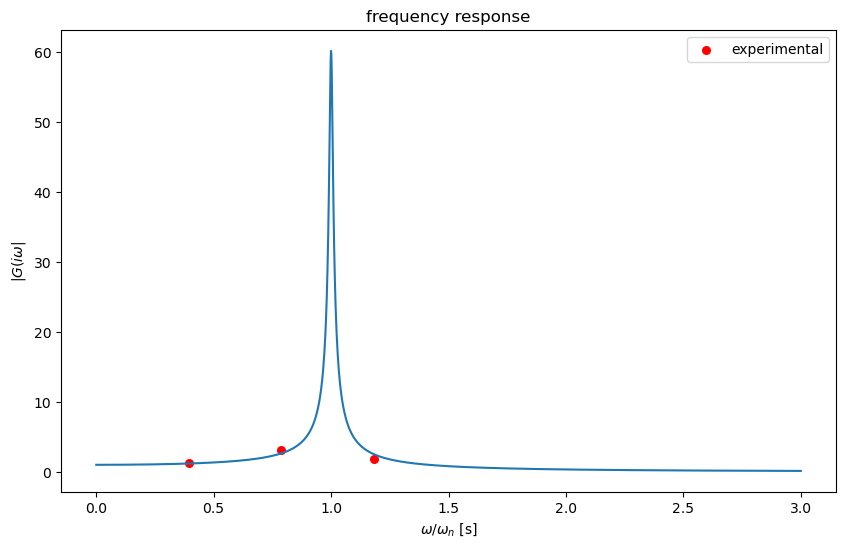

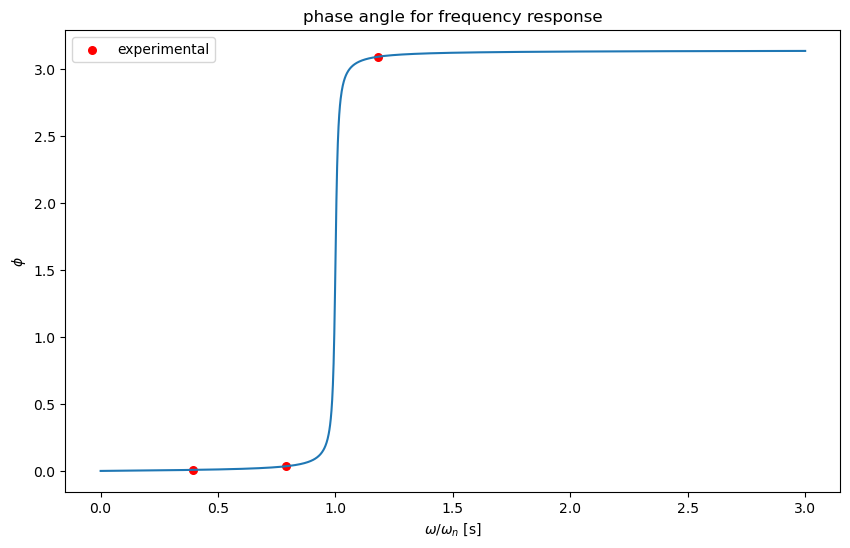

In [65]:
import matplotlib.pyplot as plt 
r = linspace(0, 3, 2000); 
h_f = abs((1 + 1j*2*zeta*r) / (1 - r**2 + 1j*2*zeta*r))
phi_sys = arctan2(2*zeta*r, (1- r**2))

#========================
# frequency response
plt.figure(figsize=(10, 6))
plt.plot(r, h_f)
plt.xlabel("$\omega/\omega_n$ [s]")
plt.ylabel("$|G(i\omega|$")
plt.scatter(r_pts, T_exp, color='red',s=30,label = 'experimental')
plt.legend()
plt.title("frequency response")

#========================
# phase angle for frequency response\
plt.figure(figsize=(10, 6))
plt.plot(r, phi_sys)
plt.xlabel("$\omega/\omega_n$ [s]")
plt.ylabel("$\phi$")
plt.scatter(r_pts, phi, color='red',s=30, label = 'experimental')
plt.legend()
plt.title("phase angle for frequency response")